In [85]:
import numpy as np
import torch
from matplotlib import pyplot as plt

In [213]:
num_particles = 400 # approx
board_size = 64
knife_half_length = 16
device = "cuda" if torch.cuda.is_available() else "cpu"

In [254]:
board = torch.rand(board_size, board_size) > 0.5*2*(board_size**2 - num_particles)/(board_size**2)

In [255]:
print("Number of particles on the board: ", torch.sum(board))

Number of particles on the board:  tensor(396)


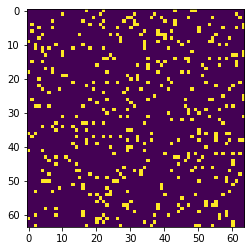

In [256]:
 plt.imshow(board)

In [252]:
def simulate_one_step(x, y, theta, move_distance, knife_half_length, board):
    coords = torch.nonzero(board)
    R = torch.Tensor([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
    transformed_coords = coords.float() @ R    
    apply_at = torch.Tensor([[x,y]]) @ R
    indices_of_interest = torch.logical_and(torch.logical_and(torch.logical_and((
                              apply_at[0,0] + move_distance) > transformed_coords[:,0], 
                              transformed_coords[:,0]> apply_at[0,0]), 
                              ((apply_at[0,1]+knife_half_length) > transformed_coords[:,1])),
                              (transformed_coords[:,1]> (apply_at[0,1] - knife_half_length)))
    to_move = transformed_coords[indices_of_interest]
    to_zero = coords[indices_of_interest]
    board[to_zero[:,0], to_zero[:,1]] = False
    to_move[:,0] = (apply_at[0,0] + move_distance) 
    to_move = (to_move@ R.T).round().long()
    board[to_move[:,0], to_move[:,1]] = True
    plt.figure()
    plt.imshow(board)
#     return board

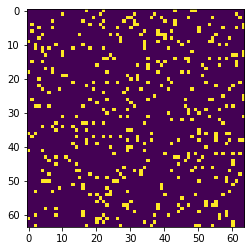

In [257]:
plt.imshow(board)

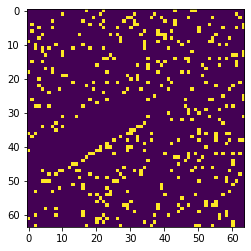

In [258]:
simulate_one_step(32,16, theta, move_distance=10, knife_half_length=knife_half_length, board=board)

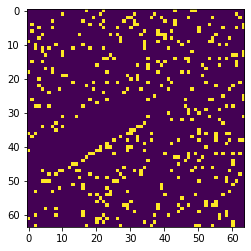

In [259]:
simulate_one_step(32,16, theta, move_distance=10, knife_half_length=knife_half_length, board=board)

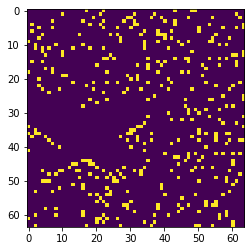

In [260]:
simulate_one_step(32,16, -theta, move_distance=10, knife_half_length=knife_half_length, board=board)

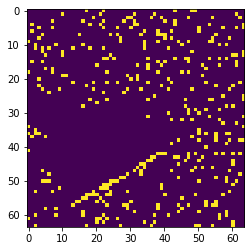

In [261]:
simulate_one_step(32,16, theta, move_distance=20, knife_half_length=knife_half_length, board=board)

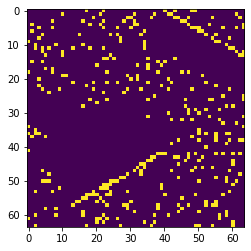

In [263]:
simulate_one_step(16,48, np.pi-theta, move_distance=7, knife_half_length=knife_half_length, board=board)

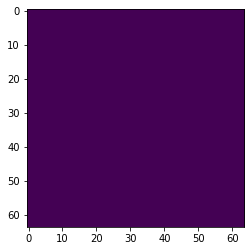

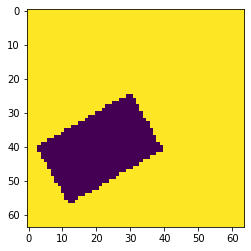

In [264]:
board = torch.rand(board_size, board_size) > 0.0

plt.imshow(board)

board

simulate_one_step(32,16, theta, move_distance=20, knife_half_length=knife_half_length, board=board)



In [175]:
coords = torch.nonzero(board)

In [176]:
theta = torch.pi/6

In [179]:
R = torch.Tensor([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])


In [180]:
transformed_coords = coords @ R

RuntimeError: expected scalar type Long but found Float

In [132]:
transformed_coords.shape

torch.Size([16, 2])

In [133]:
x,y = 4, 2

In [134]:
apply_at = torch.Tensor([[x,y]]) @ R

In [135]:
move_distance = 3

In [137]:
num_part = transformed_coords[torch.logical_and(torch.logical_and(torch.logical_and((apply_at[0,0] + move_distance) > transformed_coords[:,0], 
                              transformed_coords[:,0]> apply_at[0,0]), 
                              ((apply_at[0,1]+knife_half_length) > transformed_coords[:,1])),
                              (transformed_coords[:,1]> (apply_at[0,1] - knife_half_length)))]

In [139]:
num_part

tensor([[ 5.3301, -0.7679]], dtype=torch.float64)

In [143]:
apply_at

tensor([[ 4.4641, -0.2679]], dtype=torch.float64)

In [142]:
apply_at + torch.Tensor([[move_distance, 0]])

tensor([[ 7.4641, -0.2679]], dtype=torch.float64)

In [140]:
transformed_coords[torch.logical_and(torch.logical_and(torch.logical_and((apply_at[0,0] + move_distance) > transformed_coords[:,0], 
                              transformed_coords[:,0]> apply_at[0,0]), 
                              ((apply_at[0,1]+knife_half_length) > transformed_coords[:,1])),
                              (transformed_coords[:,1]> (apply_at[0,1] - knife_half_length)))] = apply_at + torch.Tensor([[move_distance, 0]])

In [141]:
transformed_coords[torch.logical_and(torch.logical_and(torch.logical_and((apply_at[0,0] + move_distance) > transformed_coords[:,0], 
                              transformed_coords[:,0]> apply_at[0,0]), 
                              ((apply_at[0,1]+knife_half_length) > transformed_coords[:,1])),
                              (transformed_coords[:,1]> (apply_at[0,1] - knife_half_length)))]

tensor([], size=(0, 2), dtype=torch.float64)

In [144]:
old_coords = transformed_coords @ R.T

In [155]:
old_coords = old_coords.round().long()

In [162]:
old_coords

tensor([[0, 1],
        [0, 3],
        [0, 5],
        [1, 2],
        [2, 2],
        [2, 6],
        [3, 5],
        [3, 6],
        [4, 2],
        [4, 5],
        [7, 3],
        [6, 0],
        [6, 1],
        [6, 7],
        [7, 5],
        [7, 6]])

In [163]:
new_board = torch.zeros((board_size,board_size))

In [164]:
new_board[old_coords[:,0], old_coords[:,1]] = 1

In [165]:
new_board

tensor([[0., 1., 0., 1., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 1., 0.],
        [0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 1., 1., 0.]])

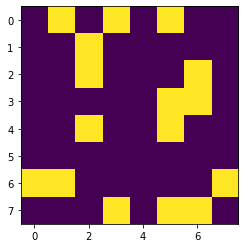

In [166]:
plt.imshow(new_board)